## DESAFÍO 05

### **Análisis del rendimiento de los jugadores de la NBA por temporada de 1978-2016**

### Resumen 
Este proyecto de análisis de datos se enfoca en explorar las dinámicas del rendimiento de los jugadores de la NBA a lo largo de cuatro décadas (1978-2016), con el propósito de comprender la influencia de factores como la edad, el true shooting y características físicas en el desempeño individual y colectivo de los equipos.

### Introducción
La NBA ha sido un escenario de cambios y transformaciones constantes a lo largo de su historia. Este proyecto tiene como objetivo arrojar luz sobre la relación entre el rendimiento de los jugadores y factores clave como la edad, el true shooting y otras características físicas y de experiencia.

**Contexto comercial**
La National Basketball Association (NBA) es una de las ligas deportivas más populares y competitivas del mundo, con millones de seguidores y un mercado en constante crecimiento. La capacidad de evaluar y comprender el rendimiento de los jugadores es fundamental para los equipos, entrenadores y directores generales, ya que les permite tomar decisiones informadas para mejorar el desempeño del equipo, tomar decisiones de contratación y maximizar el valor de los jugadores.

**Problema comercial**
Evaluar el rendimiento de los jugadores tanto indivudualmente como dentro del equipo, identificar fortalezas y debilidades, y tomar decisiones estratégicas sobre la alineación y la gestión de minutos.

Para la gestión de personal y la toma de decisiones en el draft, es importante evaluar el potencial de los jugadores. Los equipos pueden utilizar datos históricos y estadísticas avanzadas para identificar talentos emergentes y tomar decisiones de contratación informadas.

## Objetivos:

* Analizar la relación entre la edad de los jugadores y su rendimiento individual, así como la influencia de la edad promedio de los equipos en sus resultados.
* Identificar picos, tanto positivos como negativos, en variables clave como el true shooting, con el fin de determinar si el desempeño de un equipo se ve afectado significativamente por el rendimiento de un jugador en particular.
* Investigar la influencia de factores adicionales como peso, altura y años de experiencia en el rendimiento de los jugadores y su impacto en el éxito del equipo.

## Hipótesis:

1. Edad y Rendimiento Individual:
H0: La edad de los jugadores de la NBA no tiene una correlación significativa con su rendimiento individual.
H1: La edad de los jugadores de la NBA está relacionada de manera significativa con su rendimiento individual.

2. Edad Promedio del Equipo y Éxito del Equipo:
H0: La edad promedio de un equipo de la NBA no está relacionada con su éxito en la temporada.
H1: La edad promedio de un equipo de la NBA está relacionada de manera significativa con su éxito en la temporada.

3. True Shooting y Éxito del Equipo:
H0: El true shooting no está relacionado con el éxito del equipo en la NBA.
H1: El true shooting está relacionado de manera significativa con el éxito del equipo en la NBA.

4. Factores Físicos y Rendimiento:
H0: No hay correlación positiva entre la altura y el peso de los jugadores de la NBA y su rendimiento en términos de rebotes, bloqueos y puntos anotados.
H1: Existe una correlación positiva entre la altura y el peso de los jugadores de la NBA y su rendimiento en términos de rebotes, bloqueos y puntos anotados.

5. Años de Experiencia y Rendimiento:
H0: Los años de experiencia en la NBA no tienen impacto en el rendimiento de los jugadores.
H1: Los años de experiencia en la NBA están relacionados de manera significativa con el rendimiento de los jugadores.

In [16]:
import pandas as pd

url ='C:\\Users\\52444\\Desktop\\Data Science\\data-science\\NBASeasonData.csv'
dfNBA = pd.read_csv(url)
dfNBA.head()

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,...,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,...,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,...,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,...,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,...,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0


In [17]:
# Tratamiento de datos

##En todo mi df sólo se encontraron 2 filas con términos NaN, al ser una cantidad insignificante decidí eliminar las filas para no tener problemas.

# Eliminar todas las filas con NaN en el DataFrame dfNBA
dfNBA = dfNBA.dropna()


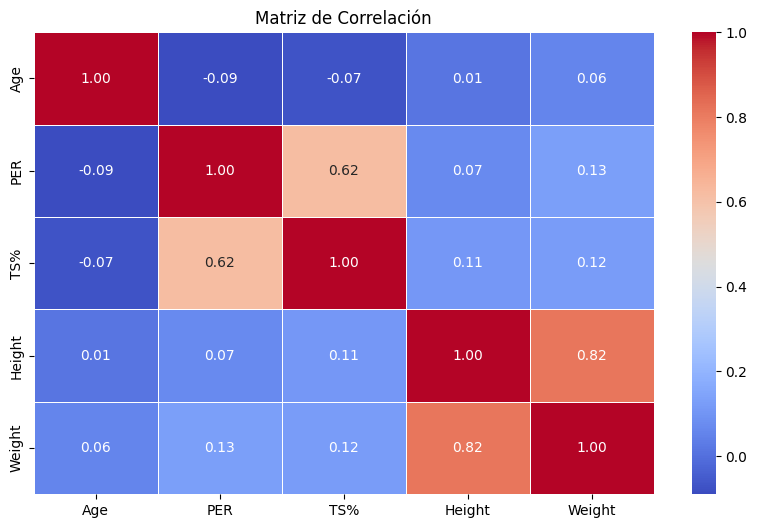

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas_interes = ['Age','PER', 'TS%', 'Height', 'Weight']
df_subset5 = dfNBA[columnas_interes]
matriz_correlacion = df_subset5.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [19]:
# HIPÓTESIS 1

from scipy.stats import pearsonr

correlation, p_value = pearsonr(dfNBA['Age'], dfNBA['PER'])
print("Coeficiente de correlación:", correlation)
print("Valor p:", p_value)

alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("La correlación es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0")


Coeficiente de correlación: -0.089968980479416
Valor p: 0.017592044526498693
La correlación es estadísticamente significativa (rechazamos H0)


In [20]:
# Hipótesis 3

from scipy.stats import pearsonr

correlation_height_trb, p_value_height_trb = pearsonr(dfNBA['Height'], dfNBA['TRB%'])
correlation_height_blk, p_value_height_blk = pearsonr(dfNBA['Height'], dfNBA['BLK%'])
correlation_height_ast, p_value_height_ast = pearsonr(dfNBA['Height'], dfNBA['AST%'])
correlation_height_stl, p_value_height_stl = pearsonr(dfNBA['Height'], dfNBA['STL%'])

alpha = 0.05  # Nivel de significancia

if p_value_height_trb < alpha:
    print("La correlación entre Height y TRB% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y TRB%")

if p_value_height_blk < alpha:
    print("La correlación entre Height y BLK% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y BLK%")

if p_value_height_ast < alpha:
    print("La correlación entre Height y AST% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y AST%")

if p_value_height_stl < alpha:
    print("La correlación entre Height y STL% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y STL%")


La correlación entre Height y TRB% es estadísticamente significativa (rechazamos H0)
La correlación entre Height y BLK% es estadísticamente significativa (rechazamos H0)
La correlación entre Height y AST% es estadísticamente significativa (rechazamos H0)
La correlación entre Height y STL% es estadísticamente significativa (rechazamos H0)


In [21]:

from scipy.stats import pearsonr

correlation_weight_trb, p_value_weight_trb = pearsonr(dfNBA['Weight'], dfNBA['TRB%'])
correlation_weight_blk, p_value_weight_blk = pearsonr(dfNBA['Weight'], dfNBA['BLK%'])
correlation_weight_ast, p_value_weight_ast = pearsonr(dfNBA['Weight'], dfNBA['AST%'])
correlation_weight_stl, p_value_weight_stl = pearsonr(dfNBA['Weight'], dfNBA['STL%'])

alpha = 0.05  # Nivel de significancia

if p_value_weight_trb < alpha:
    print("La correlación entre Weight y TRB% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y TRB%")

if p_value_weight_blk < alpha:
    print("La correlación entre Weight y BLK% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y BLK%")

if p_value_weight_ast < alpha:
    print("La correlación entre Weight y AST% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y AST%")

if p_value_weight_stl < alpha:
    print("La correlación entre Weight y STL% es estadísticamente significativa (rechazamos H0)")
else:
    print("No hay evidencia suficiente para rechazar H0 para Height y STL%")

La correlación entre Weight y TRB% es estadísticamente significativa (rechazamos H0)
La correlación entre Weight y BLK% es estadísticamente significativa (rechazamos H0)
La correlación entre Weight y AST% es estadísticamente significativa (rechazamos H0)
La correlación entre Weight y STL% es estadísticamente significativa (rechazamos H0)


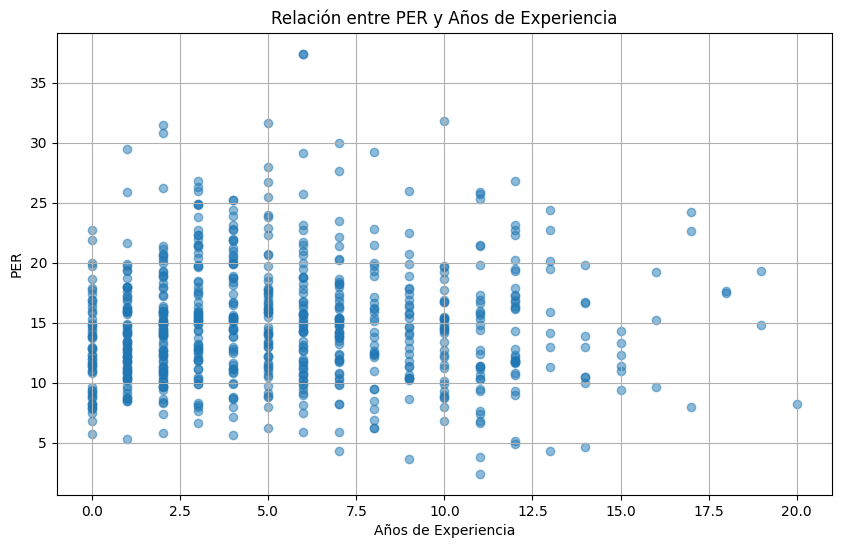

In [22]:
import matplotlib.pyplot as plt

# Filtra el DataFrame para obtener las columnas de interés
df_subset = dfNBA[['PER', 'Yrs Experience']]

# Crea un gráfico de dispersión
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.scatter(df_subset['Yrs Experience'], df_subset['PER'], alpha=0.5)
plt.title('Relación entre PER y Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('PER')
plt.grid(True)  # Agrega una cuadrícula al gráfico si lo deseas
plt.show()


In [23]:
# Hipótesis 5

from scipy.stats import pearsonr

df_subset = dfNBA[['PER', 'Yrs Experience']]
df_subset = df_subset.dropna()

# Calcula la correlación de Pearson y el valor p
correlation, p_value = pearsonr(df_subset['PER'], df_subset['Yrs Experience'])

# Define el nivel de significancia
alpha = 0.05

# Imprime el resultado de la prueba de correlación
if p_value < alpha:
    print(f"La correlación es significativa (p-value = {p_value}), rechazamos H0.")
else:
    print(f"No hay evidencia suficiente para rechazar H0 (p-value = {p_value}).")


No hay evidencia suficiente para rechazar H0 (p-value = 0.7612802526637754).


## Feature Selection
### Forward Selection



**Variable objetivo:** PER

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Variable objetivo
y = dfNBA['PER']

# Inicializa una lista para almacenar las variables seleccionadas
selected_features = []

# Variables candidatas
candidate_features = ['Age', 'TS%', 'Height', 'Weight', 'TRB%', 'BLK%', 'AST%', 'STL%', 'Yrs Experience']

# Inicializa un modelo de regresión lineal
model = LinearRegression()

# Inicializa el mejor puntaje (R^2) como 0
best_score = 0

while candidate_features:
    scores = []

    for feature in candidate_features:
        # Ajusta un modelo de regresión lineal con la variable candidata y las seleccionadas
        X = dfNBA[selected_features + [feature]]
        model.fit(X, y)
        y_pred = model.predict(X)
        
        # Calcula el R^2 del modelo
        score = model.score(X, y)
        scores.append((feature, score))

    # Selecciona la variable con el mejor puntaje (mayor R^2)
    best_feature, best_score = max(scores, key=lambda x: x[1])

    # Agrega la mejor variable al conjunto de variables seleccionadas
    selected_features.append(best_feature)

    # Elimina la mejor variable del conjunto de variables candidatas
    candidate_features.remove(best_feature)

    # Imprime la variable seleccionada y su puntaje
    print(f'Se seleccionó {best_feature} con R^2={best_score:.3f}')

# Una vez finalizado el proceso, tienes tu conjunto de variables seleccionadas
print("Variables seleccionadas:", selected_features)


Se seleccionó TS% con R^2=0.382
Se seleccionó AST% con R^2=0.495
Se seleccionó TRB% con R^2=0.659
Se seleccionó STL% con R^2=0.673
Se seleccionó BLK% con R^2=0.686
Se seleccionó Age con R^2=0.689
Se seleccionó Yrs Experience con R^2=0.709
Se seleccionó Weight con R^2=0.711
Se seleccionó Height con R^2=0.711
Variables seleccionadas: ['TS%', 'AST%', 'TRB%', 'STL%', 'BLK%', 'Age', 'Yrs Experience', 'Weight', 'Height']


In [25]:
import pandas as pd
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Define tus datos
X = dfNBA[['Age', 'TS%', 'Height', 'Weight', 'TRB%', 'BLK%', 'AST%', 'STL%', 'Yrs Experience']]
y = dfNBA['PER']

# Forward selection con statsmodels
def forward_selection_statsmodels(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features_statsmodels = forward_selection_statsmodels(X, y)
print("Características seleccionadas (statsmodels):", selected_features_statsmodels)

# Forward selection con mlxtend
sfs = SFS(LinearRegression(),
          k_features="best",  # Puedes cambiar el número de características deseado
          forward=True,
          floating=False,
          scoring='r2',  # Cambia la métrica según tus necesidades
          cv=0)

sfs.fit(X, y)
selected_features_mlxtend = sfs.k_feature_names_
print("Características seleccionadas (mlxtend):", selected_features_mlxtend)


Características seleccionadas (statsmodels):

C:\Users\52444\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\52444\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\52444\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\U

 ['TS%', 'AST%', 'TRB%', 'STL%', 'BLK%']
Características seleccionadas (mlxtend): ('Age', 'TS%', 'Height', 'Weight', 'TRB%', 'BLK%', 'AST%', 'STL%', 'Yrs Experience')


## Modelos de Aprendizaje (Regresión Lineal)

Se usarán las variables seleccionadas por Statsmodels

In [26]:
from sklearn.model_selection import train_test_split

# Divide tus datos en características (X) y la variable objetivo (y)
X = dfNBA[['TS%', 'TRB%', 'BLK%', 'AST%', 'STL%']]
y = dfNBA['PER']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ahora tienes X_train (características de entrenamiento), X_test (características de prueba), y_train (objetivo de entrenamiento) y y_test (objetivo de prueba).


## Metricas para algoritmos de Regresión Lineal

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que ya tienes tus datos de entrenamiento y prueba en X_train, X_test, y_train, y_test

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-cuadrado (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 6.48976344086554
Mean Absolute Error (MAE): 2.002387010138944
R-squared (R^2): 0.6498224169447404


## Conclusiones

### Hipótesis
Hemos realizado un análisis detallado de un dataset de la NBA que incluye una variedad de variables relacionadas con el rendimiento de los jugadores y sus características personales. A través de diferentes pruebas de hipótesis y análisis de correlación, hemos obtenido varias conclusiones importantes:

**Edad y Rendimiento Individual:** Hemos encontrado una correlación significativa entre la edad de los jugadores y su rendimiento individual (PER). Esto sugiere que la edad puede influir en la calidad del juego de un jugador.

**True Shooting y Éxito del Equipo:** La relación entre el True Shooting Percentage (TS%) y el éxito del equipo en la NBA se muestra como estadísticamente significativa. Esto significa que un TS% más alto tiende a estar asociado con un mejor desempeño del equipo en términos de rebotes, bloqueos, asistencias y robos de balón.

**Altura y Peso:** La altura y el peso de los jugadores están relacionados de manera significativa con sus estadísticas de rebotes (TRB%), bloqueos (BLK%), asistencias (AST%), y robos de balón (STL%). Esto sugiere que las características físicas tienen un impacto en el juego de un jugador.

**Años de Experiencia y Rendimiento:** Contrariamente a nuestras expectativas, no encontramos evidencia suficiente para afirmar que los años de experiencia en la NBA tienen un impacto significativo en el rendimiento de los jugadores.

En general, estos resultados pueden proporcionar información valiosa para los equipos, entrenadores y analistas de la NBA. La edad, el TS%, la altura y el peso son factores clave que pueden influir en el rendimiento individual y colectivo de un jugador. Sin embargo, los años de experiencia pueden no ser tan determinantes como se podría pensar.

Es importante recordar que estos resultados son basados en datos y análisis estadísticos, y cada jugador es único. Por lo tanto, otros factores individuales y de equipo también desempeñan un papel crucial en el rendimiento. Estos resultados pueden ayudar a guiar la toma de decisiones estratégicas en el baloncesto profesional.

Si se necesitan análisis adicionales o más investigaciones, este conjunto de datos proporciona una base sólida para futuras exploraciones.

### Algoritmos y validación de modelos de Machine Learning

Los resultados indican que el modelo tiene una precisión razonable en la predicción de la variable objetivo. 

**Mean Squared Error (MSE):** 6.49
Un MSE de 6.49 indica que, en promedio, las predicciones de tu modelo están a una distancia de aproximadamente 6.49 unidades cuadradas de los valores reales. Cuanto menor sea el MSE, mejor será el ajuste del modelo. Este valor sugiere que el modelo tiene un nivel moderado de precisión.

**Mean Absolute Error (MAE):** 2.00
Un MAE de 2.00 significa que, en promedio, las predicciones del modelo se desvían alrededor de 2 unidades de los valores reales e indica una precisión razonable en las predicciones del modelo.

**R-squared (R^2):** 0.65
El coeficiente de determinación (R^2) mide la proporción de la variabilidad en la variable objetivo que es explicada por el modelo. Un valor de R^2 de 0.65 sugiere que el modelo explica aproximadamente el 65% de la variabilidad en la variable objetivo. En general, un R^2 más alto es mejor, y 0.65 indica que el modelo tiene un buen poder explicativo.
